# Projet numérique 2 : choix du pas de temps

Philomène Blot

Elise Costa

## Pas fixe 

### Q.1

Un schéma de type Euler explicite est de la forme :
    $x^{j+1} = x^j + \Delta t f(t_j, x^j))$ si $\dot x(t)) = f(t,x(t))$.
    
On l'implémente en python ci-dessous, en prenant garde à utiliser numpy car l'équation différentielle à résoudre à sûrement été réduite à l'ordre 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_euler_explicit(f,x0,dt,t0=0.0, tf = 3) :
    t_j = [t0]
    x_j = [x0]
    while t_j[-1] + dt <= tf :
        x_i = x_j[-1]+ dt*f(t_j[-1], x_j[-1])
        x_j.append(x_i)
        t_i = t_j[-1] + dt
        t_j.append(t_i)
    return (np.array(t_j), np.array(x_j))

### Test

#### Notre équation à résoudre

On veut résoudre l'équation : $y''+ y = 0$.  On pose :
$
x = 
\begin{pmatrix}
y \\
y' \\
\end{pmatrix}
$ pour revenir à l'ordre 1.

On a alors $x' = 
\begin{pmatrix}
0 & 1 \\
-1 & 0 \\
\end{pmatrix}
x
$

Si la condition initiale vaut
$
x_{0} = 
\begin{pmatrix}
1 \\
0 \\
\end{pmatrix}
$,
alors $ y = cos $.

Vérifions que algorithme ne s'éloigne pas trop du résulat réel.

In [2]:
#Test1

A = np.array([[0,1],[-1,0]])
x0 = np.array([[1.0],[0.0]])


def f(t,x) : 
    return np.dot(A,x)

In [3]:
from math import cos

In [4]:
T1,X1 = solve_euler_explicit(f,x0,10**(-4))

T1[0]

0.0

#### Algorithme de test

On cherche à trouver le maximum de $\| x^j - x(t_j) \|$ pour certains pas en puissance. Une fois ce maximum déterminé, on le divise par $\Delta t$ (on ne divise que le maximum pour la complexité). On trace en fonction du pas $max\frac{\| x^j - x(t_j) \|}{\Delta t^2} $ et on essaye d'intuiter ce qui se passe.

In [ ]:
# liste de dt à tester
t = [10**(-i) for i in range(5,0,-1)]

# trouver le maximum pour g méthode de résolution
def intuiter_cs() :
    Lmaxi = []
    for dt in t :
        T, X = solve_euler_explicit(f,x0,dt)
        m = [abs(X[i][0][0]-cos(T[i])) for i in range(len(T))]
        maxi = max(m)/dt
        Lmaxi.append(maxi)
    plt.scatter(t,Lmaxi)
    
intuiter_cs()

#### Résultats

Il semble que $\frac{\| x^j - x(t_j) \|}{\Delta t} $ soit bornée par 1,495 environ. Le schéma semble bien convergent à l'ordre 1. Cela est d'ailleurs vrai par théorème de Lax : Euler explicite est consistant d'ordre 1 et stable par condition suffisante pour la stabilité ($f$ est $C^1$ par rapport à $x$ donc localement lipschitzienne par rapport à $x$).

### Q.2

#### Pourquoi la méthode de Heun est d'ordre deux (pour la consistance)

On compare avec la méthode de Heun qui est d'ordre deux pour la consistance.

Heun est défini par : $x^{j+1} = x^j + \frac{\Delta t}{2}[f(t_{j+1}, x^{t_j}) + f(t_{j+1}, x^j + \Delta t f(t_{j+1}, x^{t_j}))]$

Ainsi, pour Heun : $\boxed{\eta^{j+1} = \frac{x(t(j+1) - x(t(j) - \frac{\Delta t}{2}[f(t_{j+1}, x(t_j)) + f(t_{j+1}, x(t_j) + \Delta t f(t_{j+1}, x(t_j)))]}{\Delta t}}$

Or, comme $\dot{x}(t) = f(t, x(t)) $ et que $f$ est $C^1$ alors x est $C^2$. Ainsi :

$x(t_{j+1}) = x(t_j) + \Delta t f(t_j, x(t_j)) + \frac{\Delta t^2}{2} \ddot x (t_{j+1}) + O({\Delta {t^{3}}})$

Par règle de la chaîne, on obtient finalement :

$\boxed {x(t_{j+1}) = x(t_j) + \Delta t f(t_j, x(t_j)) + \frac{\Delta t^2}{2} [\frac{\partial f}{\partial t}(t_{j},x(t_{j})) + f(t_{j},x(t_{j}))\frac{\partial f}{\partial x}(t_{j},x(t_{j})))] + O({\Delta {t^{3}}})}$

Par ailleurs :

$\boxed {f(t_{j+1}, x(t_j) + \Delta t f(t_{j+1}, x(t_j))) = f(t_j, x(t_j)) + \Delta t [\frac{\partial f}{\partial t}(t_{j},x(t_{j})) + f(t_{j},x(t_{j}))\frac{\partial f}{\partial x}(t_{j},x(t_{j})))] ++ O({\Delta {t^{2}}})}$

En combinant les trois encadrés : $\color{red}{\boxed {\eta^{j+1} = O(\Delta t^2)}}$, i.e. la méthode de Heun est d'ordre 2 pour la consistance.


#### Implémentation

In [5]:
def solve_heun(f,x0,dt,t0=0.0, tf = 3) :
    t_j = [t0]
    x_j = [x0]
    while t_j[-1] + dt <= tf :
        x_i = x_j[-1]+ dt*( f(t_j[-1], x_j[-1]) + f(t_j[-1]+dt, x_j[-1] + dt*f(t_j[-1], x_j[-1])))/2
        x_j.append(x_i)
        t_i = t_j[-1] + dt
        t_j.append(t_i)
    return (np.array(t_j), np.array(x_j))

In [6]:
# test

T2,X2 = solve_heun(f,x0,10**(-5), 0.0, 1.0)

# la méthode est bien implémentée

#### Algotithme de test

On suit le même schéma que précédemment.

On cherche à trouver le maximum de $\| x^j - x(t_j) \|$ pour certains pas en puissance. Une fois ce maximum déterminé, on le divise par $\Delta t^2$ car ici, on veut tester la convergence à l'ordre 2. On trace en fonction du pas $max\frac{\| x^j - x(t_j) \|}{\Delta t^2} $ et on essaye d'intuiter ce qui se passe.

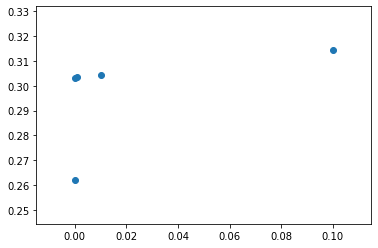

In [8]:
t = [10**(-i) for i in range(5,0,-1)]

def intuiter_cs_2() :
    Lmaxi = []
    for dt in t :
        T, X = solve_heun(f,x0,dt)
        m = [abs(X[i][0][0]-cos(T[i])) for i in range(len(T))]
        maxi = max(m)/(dt**2)
        Lmaxi.append(maxi)
    plt.scatter(t,Lmaxi)
    
intuiter_cs_2()

Il semble que $\frac{\| x^j - x(t_j) \|}{\Delta t^2} $ soit bornée par 0,33 environ. Le schéma semble bien convergent d'ordre 2. Son ordre de convergence est donc plus élevé que celui d'Euler explicite : cette méthode fournira des résultats plus fins que ceux d'Euler explicite.

Heun est bien convergent à l'ordre 2 par théorème de Lax : Euler explicite est consistant à l'ordre 2 et stable par condition suffisante pour la stabilité (montrée en exercice).

## Adaptation au pas de temps

### Q.3

$\tilde{x}(t_{j+1})$ = $e^{j+1} + x^{j+1}$ $(*)$

D'après la définition de  et f étant $C^1$ d'après l'énoncé, $\tilde{x}$ est de classe $C^2$.

On effectue donc un DL à l'ordre 2 de $\tilde{x}$  en $t_{j+1}$ :

$\tilde{x}(t_{j+1})$ = $\tilde{x}$ $(t_{j} + \Delta t)$
                     = $\tilde{x}$$(t_{j})$ + $ \Delta {t}$$\dot {\tilde{x}}$$(t_{j})$ + $ \Delta {t^{2}}$$\ddot {\tilde{x}}$$(t_{j})$× $\frac{1}{2}$+$\omicron ({\Delta {t^{2}}})$   $(**)$
                    

Comme on suit un schéma d'Euler explicite d'ordre 1, on a la relation suivante :

$x^{j} - x^{j+1}$ = - $\Delta t$$f(t_{j},x^{j})$

On a également :

$\tilde{x}(t_{j})$ = $x^{j}$
et

$\dot {\tilde{x}}$$(t_{j})$ = $ f(t_{j}, \tilde{x}(t_{j}))$

En combinant les trois dernières équations avec
$(*)$ et $(**)$ , on obtient :

$ {e^{j+1}}$ = $\Delta {t^{2}}$($\frac{\partial f}{\partial t}$$(t_{j}$$,x^{j})$ + $f(t_{j},x^{j})$$\frac{\partial f}{\partial x}$$(t_{j}$$,x^{j})$)×$\frac{1}{2}$ + $\omicron ({\Delta {t}})$

Comme f est classe $C^1$, on peut effectuer un DL à l'ordre 1 de f en $(t_{j+1}$$,x^{j+1})$ :

$\Delta t$$\frac{\partial f}{\partial t}$$(t_{j}$$,x^{j})$ + $\Delta t$$f(t_{j},x^{j})$$\frac{\partial f}{\partial x}$$(t_{j}$$,x^{j})$ = $f(t_{j+1}$$,x^{j+1})$ - $f(t_{j}$$,x^{j})$ + $\omicron ({\Delta {t}})$ $(****)$

En multipliant $(****)$ par $\Delta {t}$× $\frac{1}{2}$, on a en combinant avec $(***)$ :


${e^{j+1}}$ = $\Delta t$$(f(t_{j+1}$$,x^{j+1})$ - $f(t_{j}$$,x^{j}))$×$\frac{1}{2}$ + $\omicron ({\Delta {t^{2}}})$

En passant au module, on obtient donc la formule souhaitée :

$\color{red}{\boxed {\| e^{j+1}\| = \| {\Delta t(f(t_{j+1},x^{j+1}) - f(t_{j},x^{j}))×\frac{1}{2}}\| + Ο(\Delta {t^{3}})}} $

### Q.4

On a définit $\tilde{x}(t_j) = x^j $. On est donc dans le cas $e^{j+1} = \Delta t_{j} \ \eta^{j+1}$.

Or, le schéma d'Euler explicite est consistant d'ordre 1. Ainsi, il existe $c_s$ une constante telle que, pour tout $ 0 \ \le \ j \ \le \ J-1$ : $\| \eta^{j+1} \| \le c_s \Delta t_{j} $ donc a fortiori :  $\| \eta^{j+1} \| = \mathrm{O} (c_s \Delta t_{j}) = \mathrm{O} (\Delta t_{j}) $. Ainsi : $\boxed{e^{j+1} = \mathrm{O} ((\Delta t_{j})^2)}$.

$[1]$ Si $\| e^{j+1} \| > Tol_{abs} $, notre programme n'accepte pas l'erreur commise car elle est considérée comme trop importante. Le programme va donc chercher à déterminer un pas plus petit telle que l'erreur (absolue) locale correspondante soit inférieure ou égale à $Tol_{abs}$. Le pas doit en effet être forcément plus petit pour que l'on se rapproche des conditions où la linéarisation donne un résultat plus proche de la valeur réelle. Or $\Delta t_{new} < \Delta t_{j}$ par construction de $\Delta t_{new}$ si $\| e^{j+1} \| > Tol_{abs} $ ce qui est rassurant.

Plus précisément :

On sait que $e^{j+1} = \mathrm{O} ((\Delta t_{j})^2)$ donc $ \sqrt{\|e^{j+1}\|} = \mathrm{O} (\Delta t_{j}) \ \ [*]$.

Or, on voudrait que le nouveau pas $\Delta t_{new}$ soit tel que $ \sqrt{\|e^{new}\|} \le \sqrt{Tol_{abs}}$. On choisit : $ \sqrt{\|e^{new}\|} = \sqrt{Tol_{abs}}$.

$[*]$ donne : il existe $h$ fonction bornée au voisinage telle que $\sqrt{\|e^{X}\|} = h(\Delta t_{X}) \Delta t_{}$. En première approximation, si on considère que les variations de h sont faibles, on a : $ \frac{\sqrt{\|e^{j+1}\|}}{(\Delta t_{j})} = \frac{\sqrt{\|e^{new}\|}}{(\Delta t_{new})} = \frac{\sqrt{Tol_{abs}}}{(\Delta t_{new})}$.

On a donc bien, en posant $ \Delta t_{j} = \Delta t $ : $\color{red}{\boxed{ \Delta t_{new} = \Delta t \sqrt{\frac{ Tol_{abs}}{\|e^{j+1}\|}}}}$.

On peut de plus affiner ce résultat en multipliant  $ \Delta t_{new} $ par $C$ une constante appartenant à $\left]0,1\right[$ qui ne soit pas trop faible pour ne pas ralentir le programmme. On peut penser que $ C = \frac{1}{2} $ est un bon compromis.

$[2]$ Si $\| e^{j+1} \| < Tol_{abs} $, une stratégie analogue nous permet d'augmenter  $ \Delta t_{new} $.

$[3]$ Si $\| e^{j+1} \| = Tol_{abs} $, $ \Delta t_{new} $ vaut $ \Delta t $.

### Q.5

In [1]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax: # on veut avoir un pas plus grand
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

On prend un argument une fonction $f$ telle que $\dot {x} = f(t,x(t))$, des conditions initiales $t_0$ et $x_0$, et finale $t_f$. Mais ici, on va chercher à calculer des points intermédiaires entre les valeurs du pas $dtmax$ afin de rester le plus proche possible de la vraie solution.

Ces valeurs intermédiaires ne seront pas ajoutées dans la liste afin de ne pas trop augmenter la complexité en mémoire.

Pour calculer les points intermédiaires, on adapte le pas avec la méthode définie ci-dessus. La norme de $\|e^{j+1}\|$ est calculée à l'aide de l'expression : $ \| e^{j+1}\| = \| {\Delta t(f(t_{j+1},x^{j+1}) - f(t_{j},x^{j}))×\frac{1}{2}}\| + Ο(\Delta {t^{3}}) $ que l'on approxime par $\| e^{j+1}\| = \| {\Delta t(f(t_{j+1},x^{j+1}) - f(t_{j},x^{j}))×\frac{1}{2}}\|$. Des sécurités sont de plus ajoutées pour affiner ce parcours intermédiaire : on multiplie l'expression du nouveau pas intermédiaire par $0.9$, si ce pas intermédiaire est plus petit que $dtmin$, on arrête le programme afin d'éviter qu'il tourne en faisant du sur-place ou presque, et si le pas est trop grand (ici plus grand strictement que $\frac{dtmax}{2}$), alors on le limite à $\frac{dtmax}{2}$.

A partir du moment où les calculs intermédiaires parcourent une largeur $dtmax$, on souhaite stocker la valeur en $ts[-1] + dtmax$. Pour se faire, on calcule $dt2DT$ qui est distance (négative ou nulle) qui nous sépare de $ts[-1] + dtmax$. On calcule alors la valeur de $x$ correspondant. On complète alors $ts$ et $xs$.

On itère ce processus jusqu'à ce que l'on dépasse la valeur maximale en temps $t_f$.

